# Classificação de textos - Análise de Sentimentos
## Processamento de Linguagem Natural
Nesta aula continuaremos trabalhando com Classificação de textos, porém agora focaremos em uma tarefa específica, chamada de **Análise de Sentimentos**. 

O objetivo é que ao final desta aula você:
1. Entenda o que é a **Análise de Sentimentos**
2. Saiba treinar um classificador supervisionado para realizar análise de sentimentos usando um corpus anotado
3. Aprenda a utilizar a biblioteca Polyglot do Python que já possui métodos para identificar polaridade de textos em português
4. Acesse API do Twitter para obter dados em tempo real de redes sociais




### **O que é a Análise de Sentimentos?**

É a interpretação e classificação de emoções relativas a um texto, sendo estas emoções explícitas declaradas no texto ou implícitas.

![Análise de sentimentos. Fonte: https://monkeylearn.com/sentiment-analysis/](https://docs.google.com/uc?export=download&id=1okG1oHXPhnZiBBTtpZG4b3VdaWovCndT)

É uma tarefa de PLN/Machine Learning que permite empresas identificarem os sentimentos dos consumidores em relação a produtos, marcas ou serviços, através de opiniões deixadas em redes sociais ou em canais de comunicação da empresa.


















### **Como treinar um classificador para realizar a Análise de Sentimentos?**
Iremos desenvolver nosso classificador, utilizando uma abordagem supervisionada, ou seja, precisaremos de dados rotulados com suas respectivas emoções.

O pipeline de execução é muito similar aos exemplos de classificação realizados na última semana, o que muda efetivamente são as classes/categorias envolvidas.

In [ ]:
!pip install tweepy textblob matplotlib wordcloud googletrans unidecode

# Importamos as bibliotecas necessarias

In [81]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re


In [82]:
from datetime import datetime
import json

#Buscamos dados formato Json

In [83]:
import pandas as pd
df = pd.read_json('https://raw.githubusercontent.com/stacktecnologias/stack-repo/master/twitter/tweet.json',lines = True) 
df.head(10)

,created_at,User_id,tweet
0,2020-09-10 15:23:03+00:00,1304077938623754240,RT @canalpeixebabel: Imperdível!! Um evento de...
1,2020-09-10 15:19:55+00:00,1304077148207091712,RT @canalpeixebabel: Imperdível!! Um evento de...
2,2020-09-10 14:53:47+00:00,1304070570036920320,Na minha conversa com o prof. Joelson Sampaio ...
3,2020-09-10 14:48:55+00:00,1304069347174907904,Chamada ciência de dados para melhorar a saúde...
4,2020-09-10 14:41:02+00:00,1304067363348897792,RT @canalpeixebabel: Imperdível!! Um evento de...
5,2020-09-10 14:38:15+00:00,1304066662019272704,RT @canalpeixebabel: Imperdível!! Um evento de...
6,2020-09-10 13:46:54+00:00,1304053739272065024,RT @MartinsLuliano: Aproveitar que Excel está ...
7,2020-09-10 13:41:24+00:00,1304052355818762240,RT @canalpeixebabel: Imperdível!! Um evento de...
8,2020-09-10 13:40:03+00:00,1304052018043068416,RT @canalpeixebabel: Imperdível!! Um evento de...
9,2020-09-10 13:33:03+00:00,1304050256494186496,RT @canalpeixebabel: Imperdível!! Um evento de...


## Limpando os Tweets

In [84]:
import re
#USANDO FUNÇÃO PARA LIMPAR OS TWEETS

def limpando(twt):
    twt = re.sub('RT[\s]+', '', twt) # Removendo RT
    twt = re.sub('https?:\/\/\S+', '', twt) # Removendo hyperlink
    twt = re.sub('&amp','', twt)# removendo marcação HTML de início
    twt = re.sub('@[A-Za-z0–9]+', '', twt) #removendo @
    twt = re.sub('#', '', twt) #removendo #
  
    return twt

In [85]:
df['tweet'] = df['tweet'].apply(limpando)

In [86]:
df

,created_at,User_id,tweet
0,2020-09-10 15:23:03+00:00,1304077938623754240,: Imperdível!! Um evento de devas para devs em...
1,2020-09-10 15:19:55+00:00,1304077148207091712,: Imperdível!! Um evento de devas para devs em...
2,2020-09-10 14:53:47+00:00,1304070570036920320,Na minha conversa com o prof. Joelson Sampaio ...
3,2020-09-10 14:48:55+00:00,1304069347174907904,Chamada ciência de dados para melhorar a saúde...
4,2020-09-10 14:41:02+00:00,1304067363348897792,: Imperdível!! Um evento de devas para devs em...
...,...,...,...
1303,2020-09-01 21:20:58+00:00,1300906518452338688,Meti como meta todos os dias fazer uma hora do...
1304,2020-09-01 21:07:50+00:00,1300903213005185024,"_fc: O CEO da , Fernando Fleury, conta sobre a..."
1305,2020-09-01 21:05:20+00:00,1300902583318519808,a única saudades que eu sinto da engenharia é...
1306,2020-09-01 21:00:01+00:00,1300901246262534144,📍Vamos juntos re(imaginar) \n\nPreparamos uma ...


## Usando as funções para classificar a "Polaridade" dos textos

In [87]:
language = 'pt'

In [88]:
# Função que analisa e obtém a polaridade
def pol(text):
    return  TextBlob(text).sentiment.polarity

In [89]:
def subjetiv(text):
    return TextBlob(text).sentiment.subjectivity


In [90]:
#GERANDO A ANALISE PARA VERIFICAR O SENTIMENTO
df['Subjetividade'] = df['tweet'].apply(pol)
df['Polaridade'] = df['tweet'].apply(pol)



# Mostra um novo dataframe com as colunas subjetividade e polaridade
df.head()

,created_at,User_id,tweet,Subjetividade,Polaridade
0,2020-09-10 15:23:03+00:00,1304077938623754240,: Imperdível!! Um evento de devas para devs em...,0.0,0.0
1,2020-09-10 15:19:55+00:00,1304077148207091712,: Imperdível!! Um evento de devas para devs em...,0.0,0.0
2,2020-09-10 14:53:47+00:00,1304070570036920320,Na minha conversa com o prof. Joelson Sampaio ...,0.0,0.0
3,2020-09-10 14:48:55+00:00,1304069347174907904,Chamada ciência de dados para melhorar a saúde...,0.0,0.0
4,2020-09-10 14:41:02+00:00,1304067363348897792,: Imperdível!! Um evento de devas para devs em...,0.0,0.0


In [91]:
#CLASSIFICANDO 

def gerar(pontua):
    if pontua < 0:
        return 'Negativo'
    elif pontua == 0:
        return 'Neutro'
    else:
        return 'Positivo'
df['Analise'] = df['Polaridade'].apply(gerar)
df

,created_at,User_id,tweet,Subjetividade,Polaridade,Analise
0,2020-09-10 15:23:03+00:00,1304077938623754240,: Imperdível!! Um evento de devas para devs em...,0.00,0.00,Neutro
1,2020-09-10 15:19:55+00:00,1304077148207091712,: Imperdível!! Um evento de devas para devs em...,0.00,0.00,Neutro
2,2020-09-10 14:53:47+00:00,1304070570036920320,Na minha conversa com o prof. Joelson Sampaio ...,0.00,0.00,Neutro
3,2020-09-10 14:48:55+00:00,1304069347174907904,Chamada ciência de dados para melhorar a saúde...,0.00,0.00,Neutro
4,2020-09-10 14:41:02+00:00,1304067363348897792,: Imperdível!! Um evento de devas para devs em...,0.00,0.00,Neutro
...,...,...,...,...,...,...
1303,2020-09-01 21:20:58+00:00,1300906518452338688,Meti como meta todos os dias fazer uma hora do...,0.00,0.00,Neutro
1304,2020-09-01 21:07:50+00:00,1300903213005185024,"_fc: O CEO da , Fernando Fleury, conta sobre a...",0.05,0.05,Positivo
1305,2020-09-01 21:05:20+00:00,1300902583318519808,a única saudades que eu sinto da engenharia é...,0.00,0.00,Neutro
1306,2020-09-01 21:00:01+00:00,1300901246262534144,📍Vamos juntos re(imaginar) \n\nPreparamos uma ...,0.00,0.00,Neutro


In [109]:
import plotly.express as px



fig = px.bar(df, x="Analise", y="Analise", title="Sentimentos",labels = True)
fig.show()

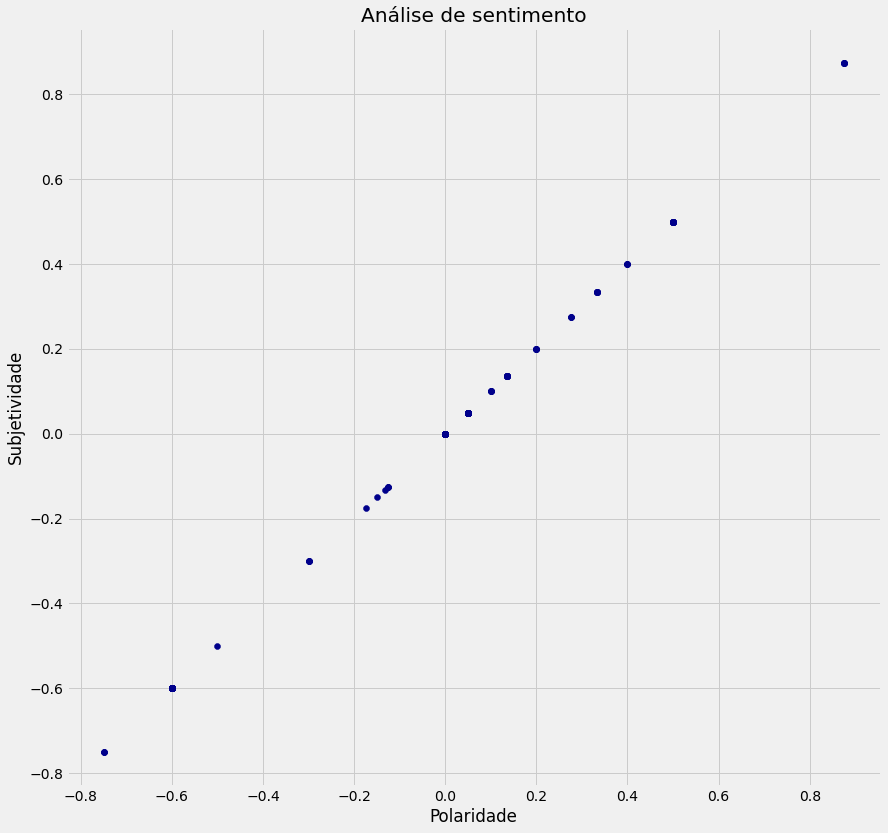

In [92]:
# Visualizando graficamente
plt.figure(figsize=(13,13)) 
for i in range(0, df.shape[0]):
    plt.scatter(df["Polaridade"][i], df["Subjetividade"][i], color='darkblue') 
plt.title('Análise de sentimento') 
plt.xlabel('Polaridade') 
plt.ylabel('Subjetividade') 
plt.show()

In [93]:
from nltk.tokenize import TweetTokenizer

## TOKENIZANDO NOSSOS DADOS, VERIFICAMOS QUE MUITA SUJEIRA AINDA E CONSIDERADA


In [104]:
tweet_tokenizer = TweetTokenizer()
tweets_tokenized = [tweet_tokenizer.tokenize(tweet) for tweet in df.tweet]
tweets_tokenized

[[':',
  'Imperdível',
  '!',
  '!',
  'Um',
  'evento',
  'de',
  'devas',
  'para',
  'devs',
  'em',
  'geral',
  ',',
  'dividido',
  'em',
  'três',
  'trilhas',
  ':',
  '-',
  'Arquitetura',
  'e',
  'Desenvolvimento',
  '.',
  'NET',
  '-',
  '…'],
 [':',
  'Imperdível',
  '!',
  '!',
  'Um',
  'evento',
  'de',
  'devas',
  'para',
  'devs',
  'em',
  'geral',
  ',',
  'dividido',
  'em',
  'três',
  'trilhas',
  ':',
  '-',
  'Arquitetura',
  'e',
  'Desenvolvimento',
  '.',
  'NET',
  '-',
  '…'],
 ['Na',
  'minha',
  'conversa',
  'com',
  'o',
  'prof',
  '.',
  'Joelson',
  'Sampaio',
  'falamos',
  'bastante',
  'sobre',
  'o',
  'papel',
  'da',
  'ciência',
  'de',
  'dados',
  'na',
  'formação',
  'do',
  'eco',
  '…'],
 ['Chamada',
  'ciência',
  'de',
  'dados',
  'para',
  'melhorar',
  'a',
  'saúde',
  'materno-infantil',
  'recebe',
  'propostas',
  'até',
  '28/09',
  '.',
  'Saiba',
  'mais',
  'em',
  ':',
  '…'],
 [':',
  'Imperdível',
  '!',
  '!',
  'Um',

## VAMOS TENTAR O MAXIMO , RETIRANDO STOPWORDS E MUDANDO ALGUNS CARACTERES

In [102]:
def reprocess(texto):
    repe = re.sub(r"http\S+", "", texto).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in texto.split() if not i in stopwords]
    return (" ".join(palavras))

In [105]:
# Aplica a função em todos os dados:
tweets = [reprocess(i) for i in df.tweet]
tweets[:20]

[': Imperdível!! Um evento devas devs geral, dividido três trilhas: - Arquitetura Desenvolvimento .NET -…',
 ': Imperdível!! Um evento devas devs geral, dividido três trilhas: - Arquitetura Desenvolvimento .NET -…',
 'Na conversa prof. Joelson Sampaio falamos bastante sobre papel ciência dados formação eco…',
 'Chamada ciência dados melhorar saúde materno-infantil recebe propostas 28/09. Saiba em:…',
 ': Imperdível!! Um evento devas devs geral, dividido três trilhas: - Arquitetura Desenvolvimento .NET -…',
 ': Imperdível!! Um evento devas devs geral, dividido três trilhas: - Arquitetura Desenvolvimento .NET -…',
 ': Aproveitar Excel trends anunciar dou aulas particulares Excel básico avançado além en…',
 ': Imperdível!! Um evento devas devs geral, dividido três trilhas: - Arquitetura Desenvolvimento .NET -…',
 ': Imperdível!! Um evento devas devs geral, dividido três trilhas: - Arquitetura Desenvolvimento .NET -…',
 ': Imperdível!! Um evento devas devs geral, dividido três trilhas: - A

## Fica visivelmente a qualidade para visualizar, muito mais facil